In [20]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [21]:
train_df = pd.read_csv("./dataset/train.csv")
test_df  = pd.read_csv("./dataset/test.csv")

In [22]:
import string

def tokenization(text):
    return text.split()

def lowercase(words: list[str]):
    return [w.lower() for w in words]

def remove_numbers(words: list[str]):
    res=[]
    for w in words:
        for d in string.digits:
            w= w.replace(d,"")

        if w!="":
            res.append(w)

    return res

def remove_punctuation(words: list[str]):
    res=[]
    for w in words:
        for p in string.punctuation:
            w= w.replace(p,"")

        if w!="":
            res.append(w)

    return res

def join_words(words):
    return " ".join(words)

In [23]:
test_x= test_df["Description"].apply(tokenization).apply(remove_numbers).apply(remove_punctuation).apply(join_words)
test_y= test_df["Class Index"]

train_x=train_df["Description"].apply(tokenization).apply(remove_numbers).apply(remove_punctuation).apply(join_words)
train_y= train_df["Class Index"]

labels=["World", "Sport", "Business", "Sci/Tech"]

In [ ]:
tf_idf = TfidfVectorizer(max_df=0.5, max_features=10000 , stop_words='english')

train_x_vec = tf_idf.fit_transform(train_x).toarray()
test_x_vec = tf_idf.transform(test_x).toarray()

In [25]:
model= MultinomialNB()
model.fit(train_x_vec, train_y)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
pred=model.predict(test_x_vec)

print(accuracy_score(test_y,pred))

0.8872368421052632


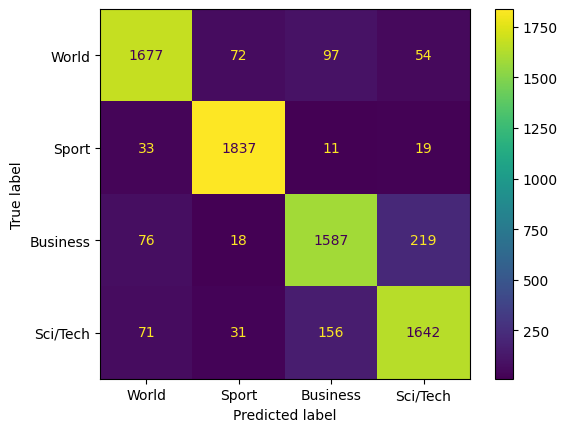

In [ ]:
import matplotlib.pyplot as plt


cm=ConfusionMatrixDisplay(confusion_matrix(test_y,pred), display_labels=labels)
cm.plot(cmap="Blues")
plt.show()